In [1]:
''' 
    This cell is prepared to provide solution to the first question of the practical task
    Question 1: Find top 10 countries that grew "Gross domestic product per capita" the most over the last decade

    -> I used WEO subject code PPPPC because it is the universal indicator GDP growth per capita 
    -> For my analysis, I used the period from 2014-2024 as the last decade
'''

# Import pandas library
import pandas as pd
import os

#import matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("../data/dataset.xlsx")

# Storing every country name
countries = df["Country"].unique()

growth_rates = {}
average_growth_rates = {}

# The start year of the last decade
start_year = 2014

# The end year of the last decade
end_year = 2024

# Calculating the growth rate of every country year by year for last decade
for country in countries:
    # Skip calculation for Lebanon
    if country != "Lebanon":
        # Extract rows related to PPPPC for the current country
        pppc_row = df.loc[(df["WEO Subject Code"] == "PPPPC") & (df["Country"] == country)]
        # Extract columns for the specified years
        last_decade_info = pppc_row.loc[:, start_year:end_year]
        # Calculate growth rate year by year and calculate the percentage
        growth_rate = ((last_decade_info.iloc[:, 1:].values - last_decade_info.iloc[:, :-1].values) / last_decade_info.iloc[:, :-1].values) * 100
        # Store growth rates for the country for the last decade
        growth_rates[country] = growth_rate

# Calculate average growth rates for each country
for country, growth_rate in growth_rates.items():
    # Calculating mean for the growth rates of the last decade
    average_growth_rate = growth_rate.mean(axis=1)
    # Storing the calculated mean to the dictionary
    average_growth_rates[country] = average_growth_rate

# Convert average growth rates to DataFrame
average_growth_rates_df = pd.DataFrame(average_growth_rates)

# Sort countries by their growth rates and get the top 10
top_10_countries = average_growth_rates_df.T.sort_values(by=0, ascending=False).head(10)

print(top_10_countries)


                    0
Libya       13.683882
Guyana      11.948329
Ireland      8.195606
Ethiopia     8.021842
Bangladesh   7.595905
Moldova      7.537589
Vietnam      7.432745
Cambodia     6.521228
China        6.502886
Guinea       6.482519


In [13]:
''' 
    This cell is prepared to answer the second question on the practical task
    Question 2: Draw OECD countries' "Population" growth over the last decade

    -> I attempted to save the population growth for each country in a separate PNG file because plotting the growth
    for all 38 countries together doesn't seem feasible and would make the plot incomprehensible. I saved the
    files in the 'outputs/population_growth' folder.

    -> The country "Lebanon" is excluded from my analysis due to significant missing data points.
'''

# List of OECD countries
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "South Korea",
    "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand",
    "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]

# Container to store population growth data for OECD countries
population_growth_container = {}

# Iterate over countries and extract population growth data
for country in countries:
    if country != "Lebanon" and country in oecd_countries:
        # Extract population growth data for the country
        population_row = df.loc[(df["Country"] == country) & (df["WEO Subject Code"] == "LP")]
        last_decade_info = population_row.loc[:, start_year:end_year]
        population_growth_container[country] = last_decade_info

# Directory to save the PNG files
save_dir = "../outputs/population_growth/"

# Plot and save population growth for each country
for country, data in population_growth_container.items():
    # Create a new figure for each country
    plt.figure(figsize=(8, 6))
    
    # Plot population growth
    plt.plot(data.columns, data.values.flatten())
    
    # Set title and labels
    plt.title(f"Population growth of {country} over the last decade")
    plt.xlabel("Year")
    plt.ylabel("Population in millions")
    
    # Customize the plot
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Save the plot as a PNG file in the specified directory
    plt.savefig(os.path.join(save_dir, f"{country}_population_growth_2014-2024.png"))
    
    # Close the current figure to release memory
    plt.close()

In [12]:
''' 
    This cell is prepared to answer the third question on the practical task
    Question 3: Save the GDP growth figures in separate charts and save them as PNG files

    -> I saved the GDP growth figures as PNG files at outputs/GDP_growth folder
    -> The country "Lebanon" is excluded from the my analysis due to significant missing data points.
'''

# List of OECD countries
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "South Korea",
    "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand",
    "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]

# Container to store GDP growth data for OECD countries
population_growth_container = {}

# Iterate over countries and extract GDP growth data
for country in countries:
    if country != "Lebanon" and country in oecd_countries:
        # Extract GDP growth data for the country
        population_row = df.loc[(df["Country"] == country) & (df["WEO Subject Code"] == "PPPPC")]
        last_decade_info = population_row.loc[:, start_year:end_year]
        population_growth_container[country] = last_decade_info

# Directory to save the PNG files
save_dir = "../outputs/GDP_growth/"

# Plot and save GDP growth for each country
for country, data in population_growth_container.items():
    # Create a new figure for each country
    plt.figure(figsize=(8, 6))
    
    # Plot GDP growth data as bar graph
    plt.bar(data.columns, data.values.flatten())
    
    # Set title and labels
    plt.title(f"GDP growth of {country} over the last decade")
    plt.xlabel("Year")
    plt.ylabel("PPP dollars per person")
    
    # Customize the plot
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Save the bar graph as a PNG file in the specified directory
    plt.savefig(os.path.join(save_dir, f"{country}_GDP_growth_2014-2024.png"))
    
    # Close the current figure to release memory
    plt.close()

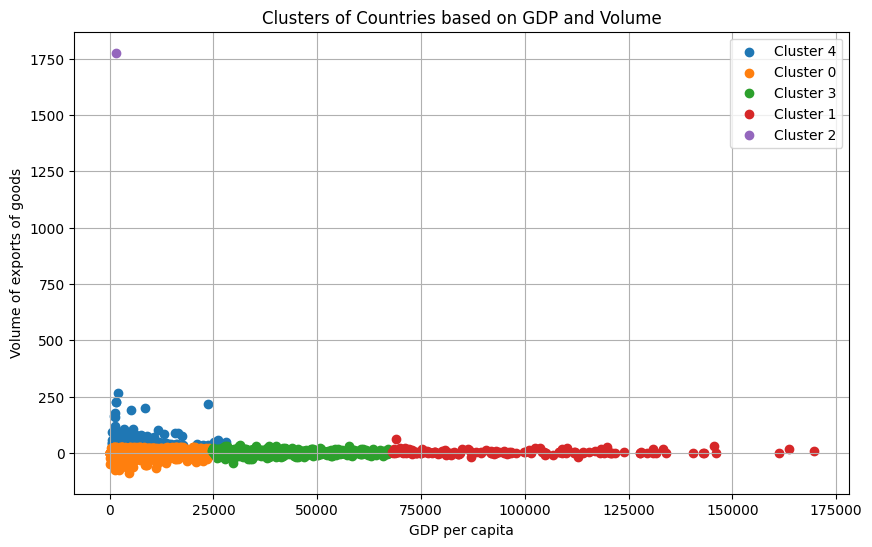

In [11]:
'''
    This cell is prepared to solve the fourth question on the practical task
    Question 4: Create 5 clusters out of the countries using GDP and "Volume of exports of goods"
                A. draw the charts (x-axis - GDP, y - volume)
                B. Add labels for the top 5 countries according to the GDP on the dots representing countries in each cluster
    -> To enable data clustering, data from the period 2003-2025 is selected since the majority of the dataset is populated within this timeframe (2003-2005).
    -> To clusters datas, I used K-Means clustering
    -> The outputs will be saved in outputs/clusters folder


'''

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Saving directory for 
save_dir = "../outputs/clusters/"

# Data fields used for clustering 
gdp_per_capita = df["WEO Subject Code"] == "PPPPC"
volume_of_exports = df["WEO Subject Code"] == "TXG_RPCH"

# Combining all conditions using logical OR
conditions = (gdp_per_capita | volume_of_exports)

# Starting working on question 4 A
# Step 1: Extract relevant data for clustering
country_data = {}
for country in countries:
    # Getting rows of GDP per capita and Volume of exports of goods based on their weo subject code
    rows = df.loc[(conditions) & (df["Country"] == country)]
    data_row = rows.loc[:, 2003:2025].values
    country_data[country] = data_row

# Step 2: Create DataFrame from extracted data
dfs = []
for country, values in country_data.items():
    if country != "Lebanon":
        df_country = pd.DataFrame(values).T
        df_country.columns = ["GDP", "Volume"]
        df_country.index.name = 'Year'
        df_country['Country'] = country
        dfs.append(df_country)

# Concatenate the DataFrames in the list
result_df = pd.concat(dfs)

# Set the index to 'Country'
result_df.set_index('Country', inplace=True)

# Convert columns to numeric values and fill NaN values with 0
result_df = result_df.apply(pd.to_numeric, errors='coerce')
result_df.fillna(0, inplace=True)

# Step 3: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(result_df)

# Step 4: Apply K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# Step 5: Visualize the Clusters
result_df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
for cluster in result_df['Cluster'].unique():
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data['GDP'], cluster_data['Volume'], label=f'Cluster {cluster}')

plt.xlabel('GDP per capita')
plt.ylabel('Volume of exports of goods')
plt.title('Clusters of Countries based on GDP and Volume')
plt.legend()
plt.grid(True)
plt.show()

# Started working on question 4 B
# Plots from question 4 B will be saved in outputs/clusters folder
# Step 6: Generate Separate Plots for Each Cluster and save them on distinguished PNG file
for cluster in result_df['Cluster'].unique():
    plt.figure(figsize=(10, 6))
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data['GDP'], cluster_data['Volume'], label=f'Cluster {cluster}')
    
    # Add labels for the top 5 countries according to GDP
    top_countries = cluster_data.nlargest(5, 'GDP')
    for i, (index, row) in enumerate(top_countries.iterrows(), 1):
        plt.annotate(f"{i}", (row['GDP'], row['Volume']), xytext=(5, -5), textcoords='offset points', ha='left', va='top', rotation=90)
    
    # Add legend with country names and ranks
    legend_labels = [f"{i}: {index}" for i, (index, _) in enumerate(top_countries.iterrows(), 1)]
    for label in legend_labels:
        plt.plot([], [], label=label)  # Add an empty plot for each legend entry
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.xlabel('GDP')
    plt.ylabel('Volume')
    plt.title(f'Cluster {cluster}: Countries based on GDP and Volume')
    plt.grid(True)
    
    # Save the plot as a PNG file will be saved in outputs/clusters folder
    plt.savefig(os.path.join(save_dir, f'cluster_{cluster}.png'), bbox_inches='tight')
    plt.close()

In [2]:
'''
    This cell is prepared to provide solution to the 5th question of the practical task
    Question 5: Find all the data fields from the year 2015 that are present in most of the countries
'''
from collections import defaultdict

# Read the Excel file
new_df = pd.read_excel("../data/dataset.xlsx")

# Initialize defaultdicts for counting and storing field descriptions
data_fields_counter = defaultdict(int)
data_fields = defaultdict(str)  # Default value for missing descriptions

# Fill NaN values in the "2015" column with 0
new_df.fillna({2015: 0}, inplace=True)

# Iterate through the DataFrame to count non-zero values and store field descriptions
for index, row in new_df.iterrows():
    # Store field descriptions for Afghanistan
    if row["Country"] == "Afghanistan":
        data_fields[row["WEO Subject Code"]] = row["Subject Descriptor"]
    
    # Count non-zero values in the "2015" column
    if row[2015] != 0:  # Assuming you only want to count non-zero values
        data_fields_counter[row["WEO Subject Code"]] += 1

# Find the most common fields
sorted_data_fields = sorted(data_fields_counter.items(), key=lambda x: x[1], reverse=True)
most_common_fields = sorted_data_fields[:10]

# Print the most common fields and their descriptions
for field_code, count in most_common_fields:
    print(f"{field_code} -> {data_fields[field_code]} (Count: {count})")

NGDP_R -> Gross domestic product, constant prices (Count: 194)
NGDP_RPCH -> Gross domestic product, constant prices (Count: 194)
NGDP -> Gross domestic product, current prices (Count: 194)
NGDPD -> Gross domestic product, current prices (Count: 194)
PPPGDP -> Gross domestic product, current prices (Count: 194)
NGDP_D -> Gross domestic product, deflator (Count: 194)
PPPSH -> Gross domestic product based on purchasing-power-parity (PPP) share of world total (Count: 194)
PPPEX -> Implied PPP conversion rate (Count: 194)
GGR -> General government revenue (Count: 194)
GGR_NGDP -> General government revenue (Count: 194)


Printing Mean squared Error for Each Continent
For Europe
Mean Squared Error (MSE) on training set: 0.15323289541001428
Mean Squared Error (MSE) on testing set: 6.168974788264071
For Asia
Mean Squared Error (MSE) on training set: 0.6162974595649172
Mean Squared Error (MSE) on testing set: 5.816340658151008
For Africa
Mean Squared Error (MSE) on training set: 0.03719311142324823
Mean Squared Error (MSE) on testing set: 2.0019800571942703
For South America
Mean Squared Error (MSE) on training set: 1.4206137316952236
Mean Squared Error (MSE) on testing set: 863.4192968497757
For North America
Mean Squared Error (MSE) on training set: 3.4695841690127174
Mean Squared Error (MSE) on testing set: 183.80493251011504
Printing the data fields used in training the model
Total investment
Gross national savings
Inflation, average consumer prices
Inflation, end of period consumer prices
Volume of imports of goods and services
Volume of Imports of goods
Volume of exports of goods and services
Volume 

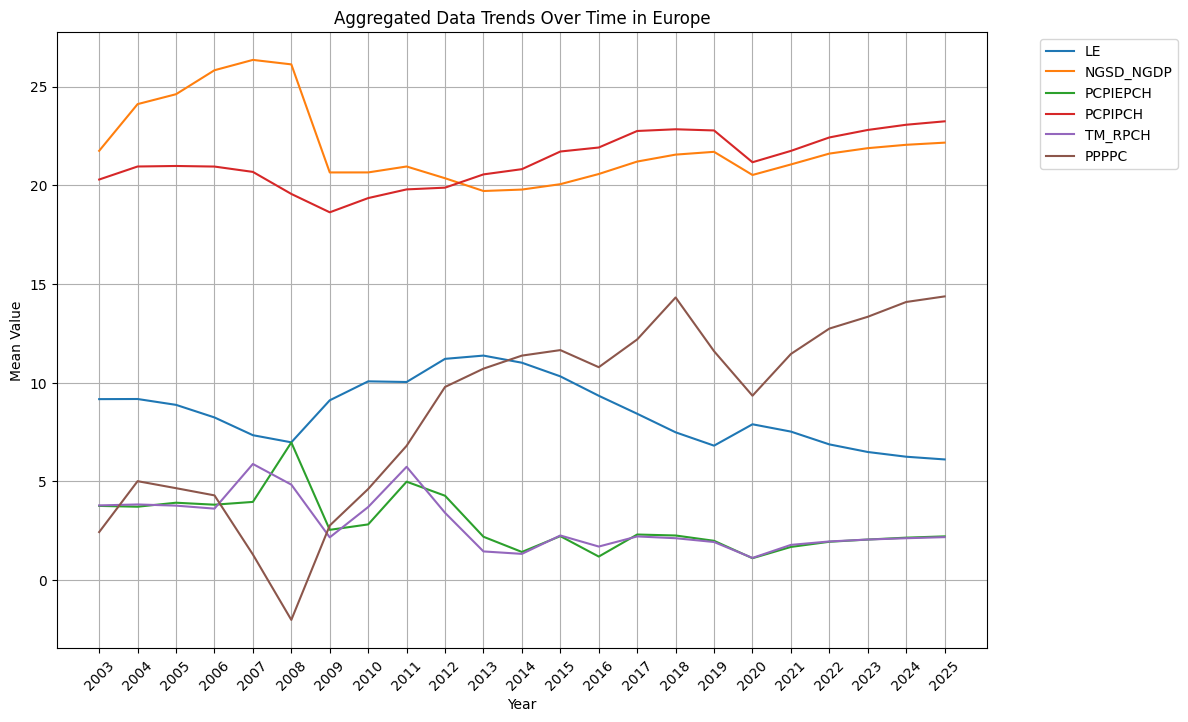

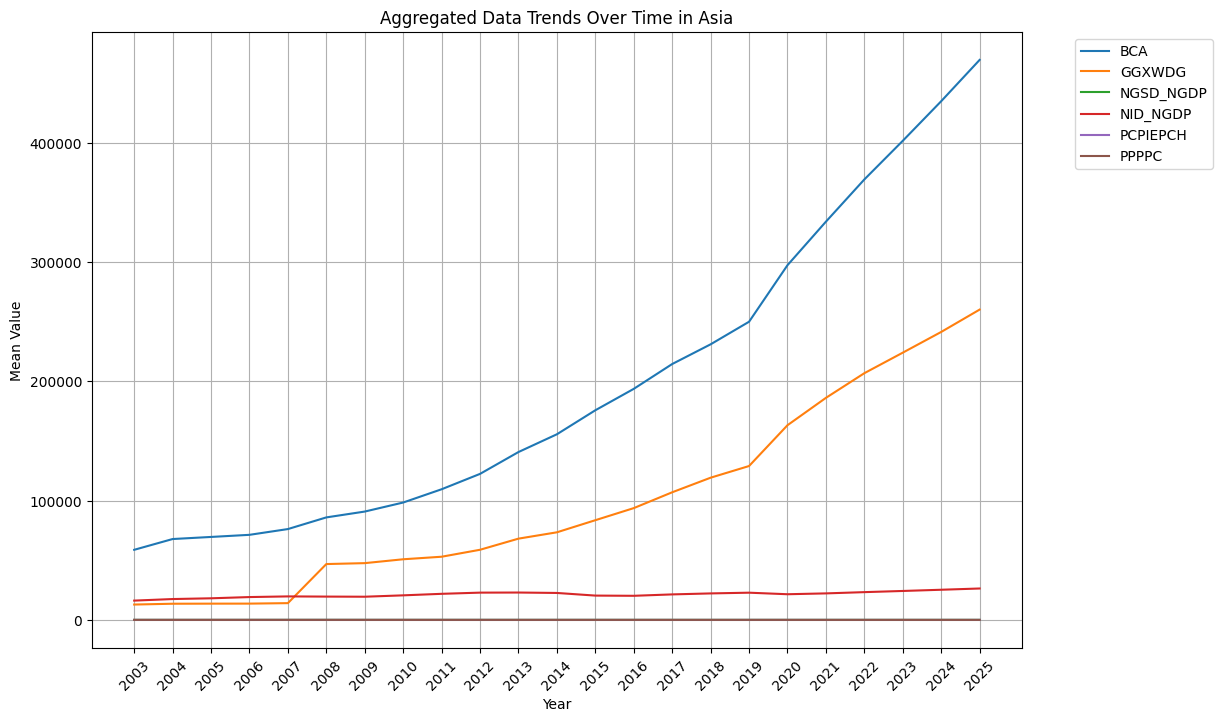

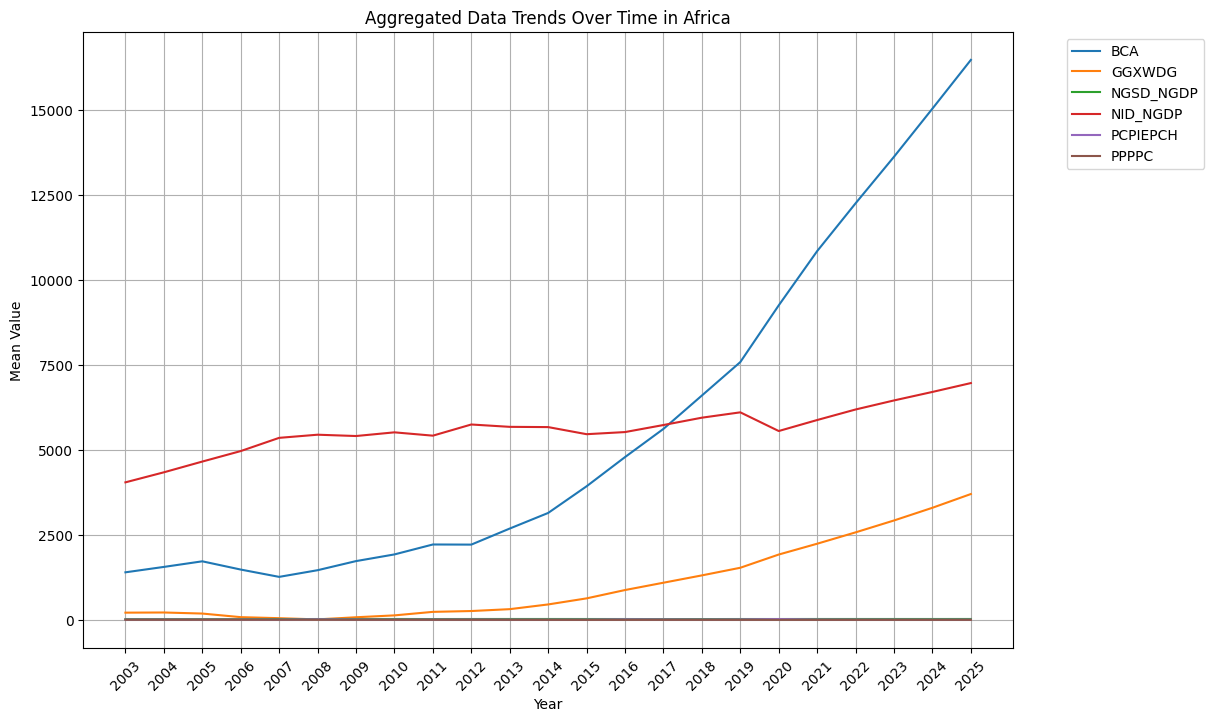

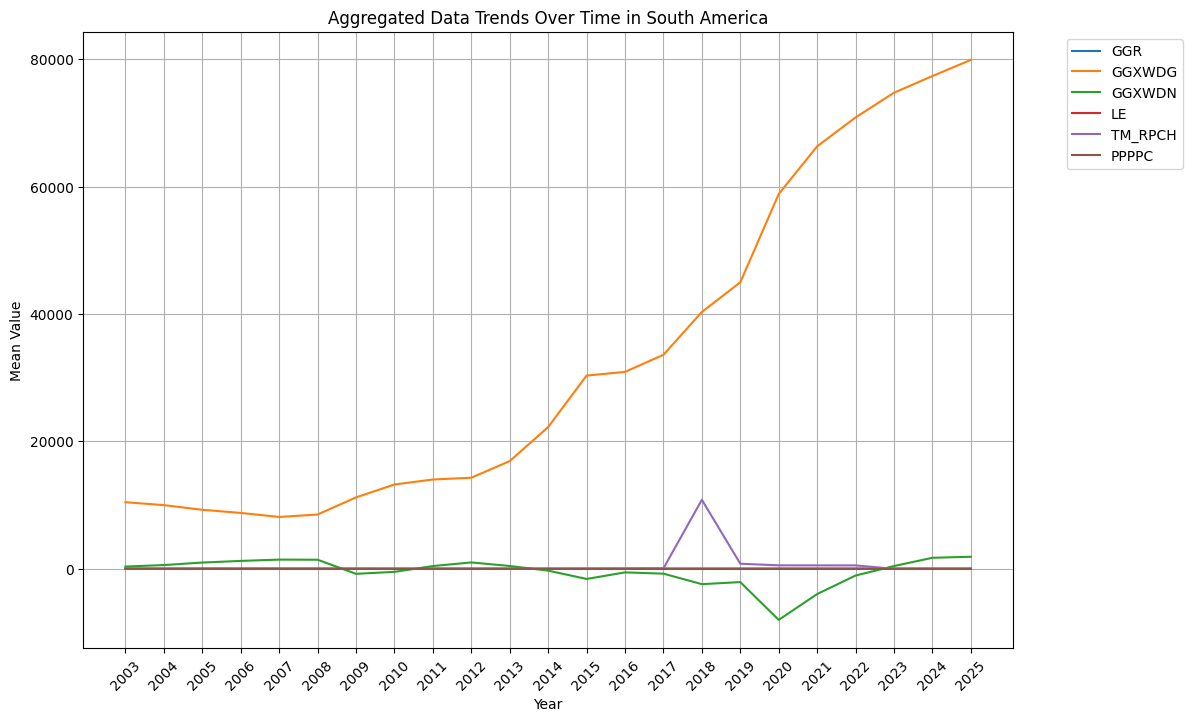

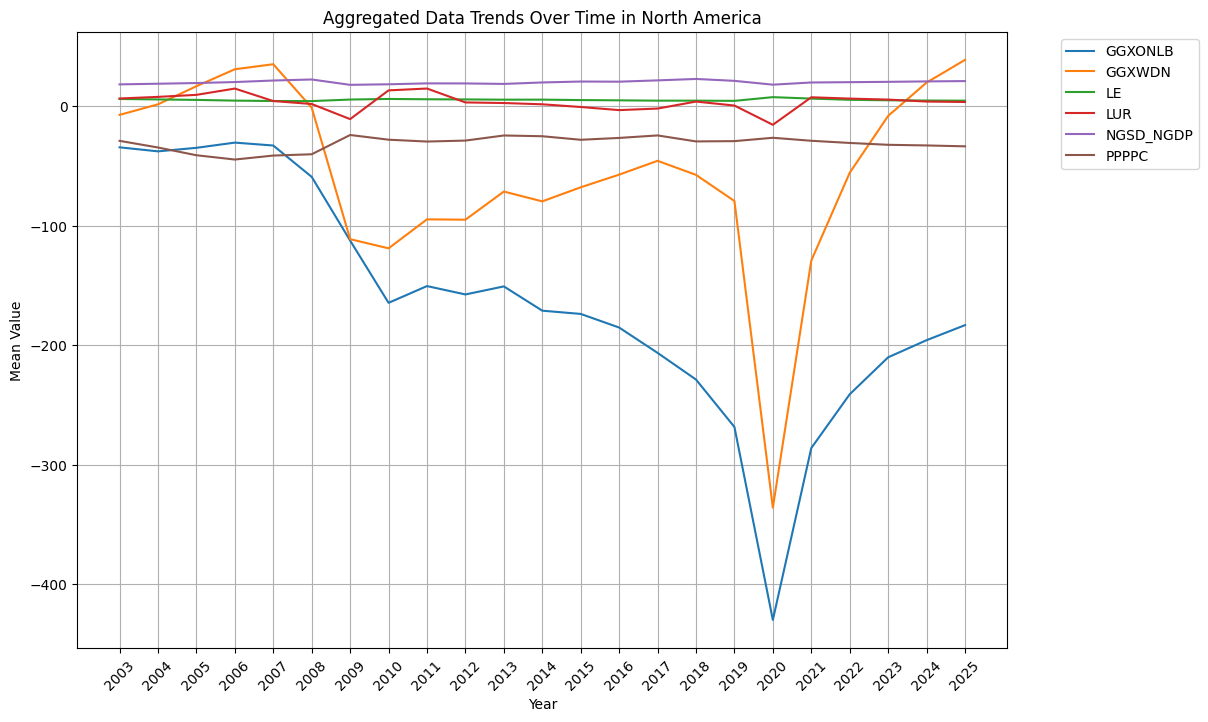

['../web/models/trained_predictor_north_america.joblib']

In [3]:
'''
        This cell is prepared to answer the 6th question on the practical task
        Question 6: Create a predictor (use scikit) to predict GDP per capita (exclude other GDP-related fields). 
                    A. Show prediction error (MSE) on the training and the testing data sets
                    B. Name the fields that were used during training
                    C. Find the top 5 fields/features that contribute the most to the predictions
                    D. Train another predictor that uses those top 5 features
                    E. Save the predictor in a file
        -> Techinically I used Ridge Regression for the prediction to mitigate overfitting
        -> The output for the predictor function is GDP per capita which is indicated by the dataset file by using the WEO Subject Code == "PPPPC"
        -> I used data from 2003-2025 for the prediction because the majority of the data is represented in this time frame
        -> To make the prediction based on each continent, 
                1. First, I found mean for each feature for each year for each country that are found
                   for each countinent
                2. Now, I have mean data for each continent, then I used this mean data to make the prediction, the GDP per capita
'''
import pandas as pd
import numpy as np

from joblib import dump

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

# Read the dataset
new_dataset = pd.read_excel("../data/dataset.xlsx")

# European countries
europe_countries = [
    "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
    "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo",
    "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco",
    "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal",
    "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain",
    "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"
]

# Asian countries
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
    "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
    "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan",
    "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal",
    "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia",
    "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan",
    "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan",
    "Vietnam", "Yemen"
]

# African countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
    "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of the Congo",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia",
    "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya",
    "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia",
    "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone",
    "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda",
    "Zambia", "Zimbabwe"
]

# South American countries
south_american_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay",
    "Peru", "Suriname", "Uruguay", "Venezuela"
]

# North American countries
north_american_countries = [
    "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",
    "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala",
    "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"
]

# Data fields or (features) used to predict the GDP per capita
total_investment = new_dataset["WEO Subject Code"] == "NID_NGDP"
gross_national_savings = new_dataset["WEO Subject Code"] == "NGSD_NGDP"
inflation_average_consumer_prices = new_dataset["WEO Subject Code"] == "PCPIPCH"
inflation_end_period_consumer_prices = new_dataset["WEO Subject Code"] == "PCPIEPCH"
volume_goods_and_services_1 = new_dataset["WEO Subject Code"] == "TM_RPCH"
volume_goods_1 = new_dataset["WEO Subject Code"] == "TMG_RPCH"
volume_goods_and_services_2 = new_dataset["WEO Subject Code"] == "TX_RPCH"
volume_goods_2 = new_dataset["WEO Subject Code"] == "TXG_RPCH"
unemployment_rate = new_dataset["WEO Subject Code"] == "LUR"
employment = new_dataset["WEO Subject Code"] == "LE"
population = new_dataset["WEO Subject Code"] == "LP"
general_government_revenue_1 = new_dataset["WEO Subject Code"] == "GGR"
general_government_total_expenditure_1 = new_dataset["WEO Subject Code"] == "GGX"
general_government_new_lending_1 = new_dataset["WEO Subject Code"] == "GGXCNL"
general_government_structural_balance_1 = new_dataset["WEO Subject Code"] == "GGSB"
general_government_primary_net_lending_1 = new_dataset["WEO Subject Code"] == "GGXONLB"
general_government_net_debt_1 = new_dataset["WEO Subject Code"] == "GGXWDN"
general_government_gross_debt_1 = new_dataset["WEO Subject Code"] == "GGXWDG"
current_account_balance_1 = new_dataset["WEO Subject Code"] == "BCA"
output_GDP = new_dataset["WEO Subject Code"] == "PPPPC"

# Combining all conditions using logical OR
conditions = (
    total_investment |
    gross_national_savings |
    inflation_average_consumer_prices |
    inflation_end_period_consumer_prices |
    volume_goods_1 |
    volume_goods_2 |
    volume_goods_and_services_1 |
    volume_goods_and_services_2 |
    unemployment_rate |
    employment |
    population |
    general_government_revenue_1 |
    general_government_total_expenditure_1 |
    general_government_new_lending_1 |
    general_government_structural_balance_1 |
    general_government_primary_net_lending_1 |
    general_government_net_debt_1 |
    general_government_gross_debt_1 |
    current_account_balance_1 |
    output_GDP
)

# Create empty dictionaries to store data for each continent
europe_data = {}
africa_data = {}
asia_data = {}
south_america_data = {}
north_america_data = {}

# Iterate over countries
for country in countries:
    # Check if the country belongs to Europe
    if country in europe_countries:
        # Filter rows based on conditions and country
        rows = new_dataset.loc[conditions & (new_dataset["Country"] == country)]
        # Extract data and store it in the corresponding dictionary
        data_row = rows.loc[:, 2003:2025].values
        europe_data[country] = data_row
    # Check if the country belongs to Africa
    if country in african_countries:
        rows = new_dataset.loc[conditions & (new_dataset["Country"] == country)]
        data_row = rows.loc[:, 2003:2025].values
        africa_data[country] = data_row
    # Check if the country belongs to Asia
    if country in asian_countries:
        rows = new_dataset.loc[conditions & (new_dataset["Country"] == country)]
        data_row = rows.loc[:, 2003:2025].values
        asia_data[country] = data_row
    # Check if the country belongs to South America
    if country in south_american_countries:
        rows = new_dataset.loc[conditions & (new_dataset["Country"] == country)]
        data_row = rows.loc[:, 2003:2025].values
        south_america_data[country] = data_row
    # Check if the country belongs to North America
    if country in north_american_countries:
        rows = new_dataset.loc[conditions & (new_dataset["Country"] == country)]
        data_row = rows.loc[:, 2003:2025].values
        north_america_data[country] = data_row

# Convert data stored in dictionaries to DataFrame for each continent
for country, data in europe_data.items():
    europe_data[country] = pd.DataFrame(data)
for country, data in africa_data.items():
    africa_data[country] = pd.DataFrame(data)
for country, data in asia_data.items():
    asia_data[country] = pd.DataFrame(data)
for country, data in south_america_data.items():
    south_america_data[country] = pd.DataFrame(data)
for country, data in north_america_data.items():
    north_america_data[country] = pd.DataFrame(data)

# Concatenate all country datasets into a single DataFrame for each continent
europe_countries_df = pd.concat(europe_data.values())
africa_countries_df = pd.concat(africa_data.values())
asia_countries_df = pd.concat(asia_data.values())
south_america_countries_df = pd.concat(south_america_data.values())
north_america_countries_df = pd.concat(north_america_data.values())

# Convert data types to numeric and handle missing values for each continent's DataFrame
europe_countries_df = europe_countries_df.apply(pd.to_numeric, errors='coerce')
europe_countries_df.fillna(0, inplace=True)

asia_countries_df = asia_countries_df.apply(pd.to_numeric, errors='coerce')
asia_countries_df.fillna(0, inplace=True)

africa_countries_df = africa_countries_df.apply(pd.to_numeric, errors='coerce')
africa_countries_df.fillna(0, inplace=True)

south_america_countries_df = south_america_countries_df.apply(pd.to_numeric, errors='coerce')
south_america_countries_df.fillna(0, inplace=True)

north_america_countries_df = north_america_countries_df.apply(pd.to_numeric, errors='coerce')
north_america_countries_df.fillna(0, inplace=True)

# Calculate mean data for each continent
europe_mean_data = europe_countries_df.groupby(level=0).mean()
asia_mean_data = asia_countries_df.groupby(level=0).mean()
africa_mean_data = africa_countries_df.groupby(level=0).mean()
south_america_mean_data = south_america_countries_df.groupby(level=0).mean()
north_america_mean_data = north_america_countries_df.groupby(level=0).mean()

# Define data columns and years
data_columns = ["NID_NGDP", "NGSD_NGDP", "PCPIPCH", "PCPIEPCH", "TM_RPCH", "TMG_RPCH",
                "TX_RPCH", "TXG_RPCH", "LUR", "LE", "LP", "GGR", "GGX", "GGXCNL",
                "GGSB", "GGXONLB", "GGXWDN", "GGXWDG", "BCA", "PPPPC"]
years = [str(year) for year in range(2003, 2026)]

# Set index for mean data
europe_mean_data.index = data_columns
asia_mean_data.index = data_columns
africa_mean_data.index = data_columns
south_america_mean_data.index = data_columns
north_america_mean_data.index = data_columns

# Transpose mean data to have years as index
europe_mean_data = europe_mean_data.T
asia_mean_data = asia_mean_data.T
africa_mean_data = africa_mean_data.T
south_america_mean_data = south_america_mean_data.T
north_america_mean_data = north_america_mean_data.T

# Set years as index
europe_mean_data.index = years
asia_mean_data.index = years
africa_mean_data.index = years
south_america_mean_data.index = years
north_america_mean_data.index = years

def predictor(predicting_data):
    """
    Perform Ridge regression on the predicting_data.

    Args:
        predicting_data (DataFrame): DataFrame containing the features and target variable.

    Returns:
        list: List of top 5 features sorted by their coefficients.
    """
    # Features and target variable
    X = predicting_data.drop(columns=["PPPPC"])
    y = predicting_data["PPPPC"]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and fitting the model
    model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Getting coefficients and feature importance
    final_estimator = model.steps[-1][1]
    coefficients = np.abs(final_estimator.coef_)
    feature_coefficients = dict(zip(data_columns, coefficients))
    sorted_features = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:5]

    # Calculating mean squared errors
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Printing mean squared errors
    print(f"Mean Squared Error (MSE) on training set: {mse_train}")
    print(f"Mean Squared Error (MSE) on testing set: {mse_test}")

    return top_features

# Answer for 6 A
print("Printing Mean squared Error for Each Continent")
print("For Europe")
europe_linear_reg = predictor(europe_mean_data)
print("For Asia")
asia_linear_reg = predictor(asia_mean_data)
print("For Africa")
africa_linear_reg = predictor(africa_mean_data)
print("For South America")
south_america_linear_reg = predictor(south_america_mean_data)
print("For North America")
north_america_linear_reg = predictor(north_america_mean_data)

# Answer for 6 B
print("Printing the data fields used in training the model")
for i in range(len(data_columns) - 1):
    print(data_fields[data_columns[i]])

# Initialize lists to store top features for each continent
top_features_europe = []
top_features_asia = []
top_features_africa = []
top_features_south_america = []
top_features_north_america = []

# Answer for 6 C
print("Printing the top-5 features that contribute the most to the predictions for each continent")
print("For Europe")
# Iterate over the sorted list of top features for Europe and print each feature
for field, coe in sorted(europe_linear_reg):
    top_features_europe.append(field)
    print(field, data_fields[field])
top_features_europe.append("PPPPC")

print("For Asia")
# Iterate over the sorted list of top features for Asia and print each feature
for field, coe in sorted(asia_linear_reg):
    top_features_asia.append(field)
    print(field, data_fields[field])
top_features_asia.append("PPPPC")

print("For Africa")
# Iterate over the sorted list of top features for Africa and print each feature
for field, coe in sorted(africa_linear_reg):
    top_features_africa.append(field)
    print(field, data_fields[field])
top_features_africa.append("PPPPC")

print("For South America")
# Iterate over the sorted list of top features for South America and print each feature
for field, coe in sorted(south_america_linear_reg):
    top_features_south_america.append(field)
    print(field, data_fields[field])
top_features_south_america.append("PPPPC")

print("For North America")
# Iterate over the sorted list of top features for North America and print each feature
for field, coe in sorted(north_america_linear_reg):
    top_features_north_america.append(field)
    print(field, data_fields[field])
top_features_north_america.append("PPPPC")

# Selecting top features based mean data from each continent from each continent's mean dataset
top_features_based_europe_mean_data = europe_mean_data[top_features_europe]
top_features_based_asia_mean_data = asia_mean_data[top_features_asia]
top_features_based_africa_mean_data = africa_mean_data[top_features_asia]
top_features_based_south_america_mean_data = south_america_mean_data[top_features_south_america]
top_features_based_north_america_mean_data = north_america_mean_data[top_features_north_america]

def plotter(dataset, continent):
    """
    Function to plot aggregated data trends over time for a specific continent.

    Args:
        dataset (DataFrame): DataFrame containing the data to be plotted.
        continent (str): Name of the continent.

    Returns:
        None
    """
    plt.figure(figsize=(12, 8))
    for feature in dataset.columns:
        plt.plot(dataset.index, dataset[feature], label=feature)

    # Add labels and legend
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.ylabel('Mean Value')
    plt.title(f'Aggregated Data Trends Over Time in {continent}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend to the right outside the plot
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot aggregated data trends over time for each continent
plotter(top_features_based_europe_mean_data, "Europe")
plotter(top_features_based_asia_mean_data, "Asia")
plotter(top_features_based_africa_mean_data, "Africa")
plotter(top_features_based_south_america_mean_data, "South America")
plotter(top_features_based_north_america_mean_data, "North America")

def top_features_based_predictor(continent):
    """
    Perform Ridge regression based on top features for a given continent.

    Args:
        continent (str): Name of the continent.

    Returns:
        model: Trained regression model.
    """
    predicting_data = None
    continent = continent.lower()

    # Select the predicting data based on the continent
    if continent == "europe":
        predicting_data = top_features_based_europe_mean_data
    elif continent == "asia":
        predicting_data = top_features_based_asia_mean_data
    elif continent == "africa":
        predicting_data = top_features_based_africa_mean_data
    elif continent == "south america":
        predicting_data = top_features_based_south_america_mean_data
    elif continent == "north america":
        predicting_data = top_features_based_north_america_mean_data

    # Features and target variable
    X = predicting_data.drop(columns=["PPPPC"])
    y = predicting_data["PPPPC"]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Ridge regression model
    model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
    model.fit(X_train, y_train)

    return model

# Answer for 6 E -> saving each continent's prediction model to a file
# Call the function for Europe
europe_model = top_features_based_predictor(continent="Europe")
dump(europe_model, '../web/models/trained_predictor_europe.joblib')
# Call the function for Asia
asia_model = top_features_based_predictor(continent="Asia")
dump(asia_model, '../web/models/trained_predictor_asia.joblib')

# Call the function for Africa
africa_model = top_features_based_predictor(continent="Africa")
dump(africa_model, '../web/models/trained_predictor_africa.joblib')

# Call the function for South America
south_america_model = top_features_based_predictor(continent="South America")
dump(south_america_model, '../web/models/trained_predictor_south_america.joblib')

# Call the function for North America
north_america_model = top_features_based_predictor(continent="North America")
dump(north_america_model, '../web/models/trained_predictor_north_america.joblib')
